# Business Problem

IBM is an American multinational technology company and they wants to know why employees are leaving the company(Fictional dataset)

# Objective

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

Parameters and their score range

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

StandardHours=80

### Part 1: Obtaining the Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 1.a Know the Datatypes


In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Part 2: Scrubbing the Data

In [5]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
front=df['Attrition']
df.drop(labels=['Attrition'],axis=1,inplace=True)
df.insert(0,'Attrition',front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#Delete Unwanted Records
df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours'],axis=1,inplace=True)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [8]:
#df['Gender']=df['Gender'].map({'Male':0,'Female':1}) Map doesnt work
Attrition={'Yes':1,'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [9]:
#Get categorical values of column 
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
# creating a dict file 
Gender={'Male':1,'Female':0}
# traversing through dataframe Gender column and writing values where key matches
df.Gender=[Gender[item] for item in df.Gender]

Field={'Life Sciences':2,'Medical':1,'Other':0,'Marketing':3,'Technical Degree':4,'Human Resources':5}
df.EducationField=[Field[item] for item in df.EducationField]

### Part 3: Exploring the Data

In [11]:
#Summary based on Attrition
df1=df.groupby('Attrition')
df1.mean()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.871046,2.771290,0.593674,65.952149,2.770479,2.145985,...,15.231144,3.153285,2.733982,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.147679,2.464135,0.632911,65.573840,2.518987,1.637131,...,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


### 3.1 Correlation between parameters

,Attrition,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,0.094277,-0.103369,0.029453,-0.006846,-0.130016,...,-0.013478,0.002889,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,0.017366,0.010146,-0.036311,0.024287,0.029820,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,-0.031376,0.018355,-0.011716,0.023381,0.046135,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,0.000068,-0.016075,-0.001851,0.031131,0.008783,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,0.031530,-0.027128,-0.016547,0.016775,0.042438,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.094277,0.017366,-0.031376,0.000068,0.031530,1.000000,-0.006058,0.001802,0.021421,-0.009296,...,-0.057384,-0.034845,0.003102,-0.010969,-0.044946,0.001242,0.004016,0.021484,0.002208,0.008355
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,-0.006058,1.000000,0.000508,-0.049857,-0.008278,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,-0.036311,-0.011716,-0.001851,-0.016547,0.001802,0.000508,1.000000,-0.000478,0.017960,...,0.002733,-0.013859,0.022868,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,0.021421,-0.049857,-0.000478,1.000000,0.042861,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,-0.009296,-0.008278,0.017960,0.042861,1.000000,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


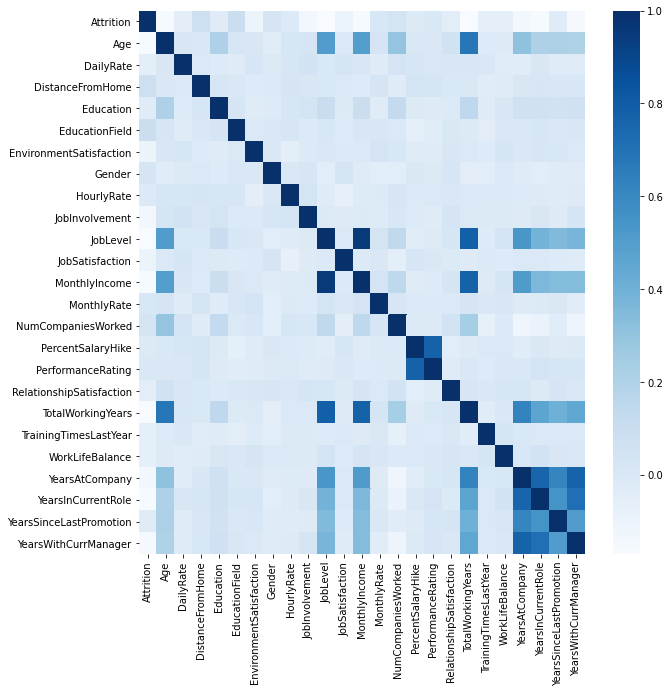

In [12]:
corr=df.corr()
corr=(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Blues')
corr


### Conclusion:

### Monthly income,Job level is highly correlated with TotalWorkingYears
### PerformanceRating is highly correlated with PercentSalaryhike

In [13]:
Attrition_Rate=df.Attrition.value_counts()/len(df)
Attrition_Rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

### Looks like about 83% of employees stayed and 16% of employees left


### 3.2  Employee income & Gender vs Attrition

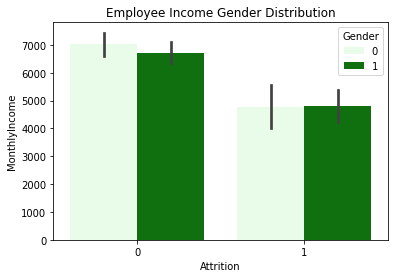

<Figure size 720x720 with 0 Axes>

In [14]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,color='green').set_title('Employee Income Gender Distribution')
plt.figure(figsize=(10, 10))
plt.show()

### 3.3 DistanceFromHome  & Gender vs Attrition

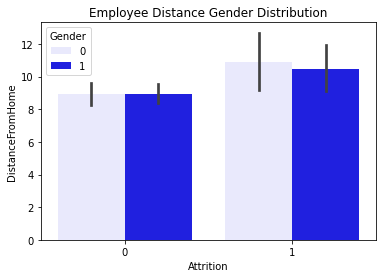

In [15]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

### 3.4  Employee Salary vs Attrition

Converting Monthly income into 5 income range

In [16]:
df['Income_Range']=pd.cut(df['MonthlyIncome'],[1000,5000,10000,15000,20000])

[]

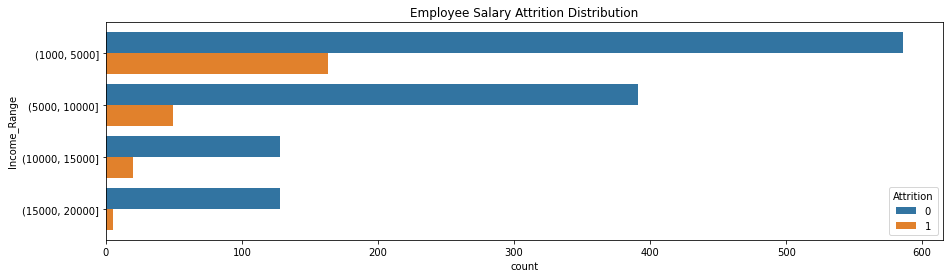

In [17]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='Income_Range',hue='Attrition',data=df).set_title('Employee Salary Attrition Distribution')
plt.plot()

### 3.5 Employee Job Satisfaction Rating vs Attrition

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

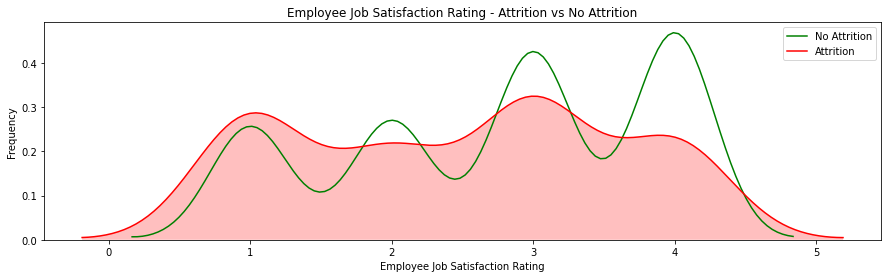

In [18]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'JobSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'JobSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

### 3.6 Employee WorkLifeBalance Rating vs Attrition

Text(0.5, 1.0, 'Employee WorkLifeBalance Rating - Attrition vs No Attrition')

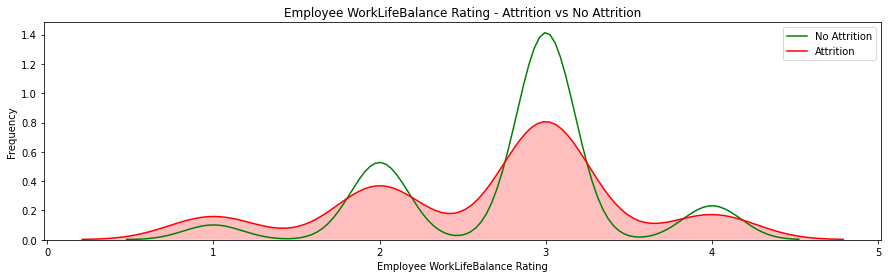

In [19]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'WorkLifeBalance'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'WorkLifeBalance'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee WorkLifeBalance Rating',ylabel='Frequency')
plt.title('Employee WorkLifeBalance Rating - Attrition vs No Attrition')

### 3.7 Employee Relationship Satisfaction vs Attrition

Text(0.5, 1.0, 'Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

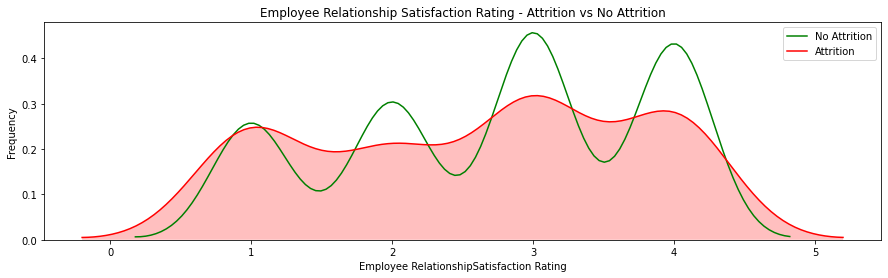

In [20]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'RelationshipSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'RelationshipSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee RelationshipSatisfaction Rating',ylabel='Frequency')
plt.title('Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

### 3.8  Employee YearsAtCompany vs Attrition

Text(0.5, 1.0, 'Employee YearsAtCompany - Attrition vs No Attrition')

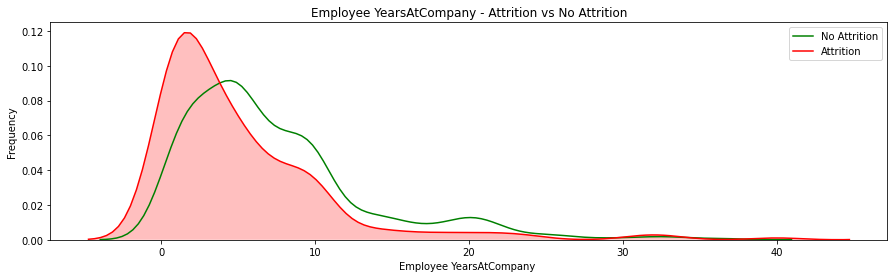

In [21]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'YearsAtCompany'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'YearsAtCompany'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee YearsAtCompany ',ylabel='Frequency')
plt.title('Employee YearsAtCompany - Attrition vs No Attrition')

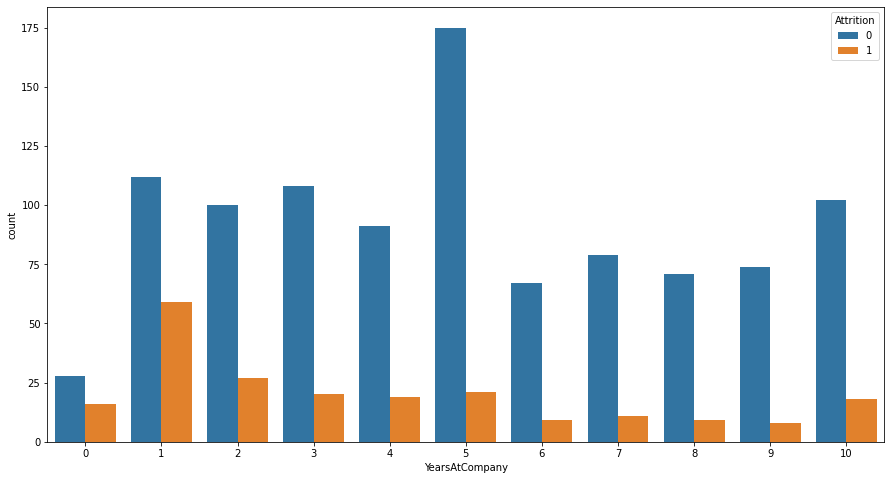

In [22]:
fig=plt.figure(figsize=(15,8))
value=df['YearsAtCompany']<11
df3=df[value]
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df3)
plt.show()

### Conclusion:

### Employee leaving the company at initial stage

### 3.9  Employee YearswithCurrentManager  vs Attrition


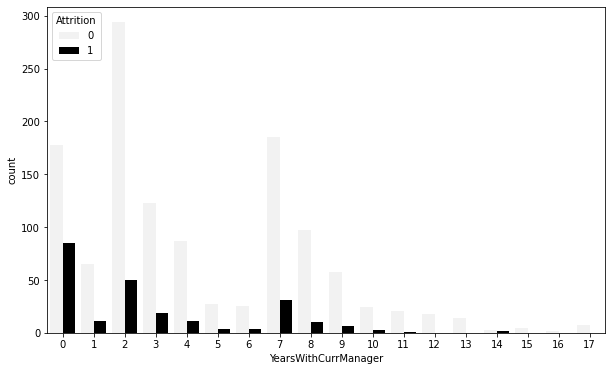

In [23]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df,color='black')
plt.show()

### 3.9  Employee YearsSinceLastPromotion  vs Attrition


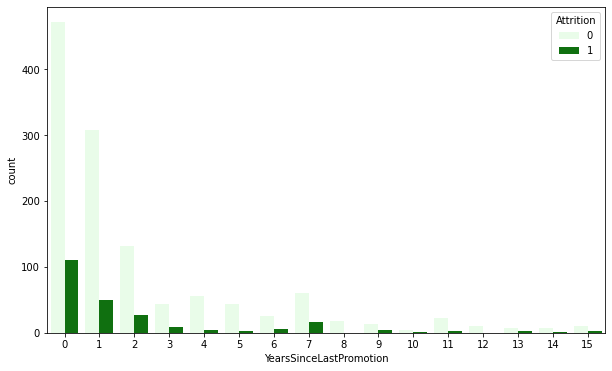

In [24]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,color='green')
plt.show()

### 3.10  Analysis of parameter vs Attrition

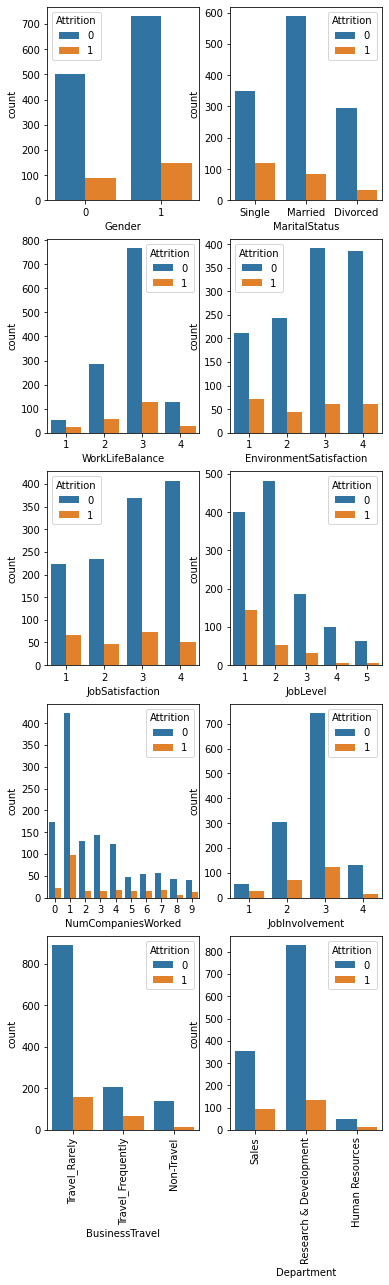

In [25]:
total_records= len(df)
columns = ["Gender","MaritalStatus","WorkLifeBalance","EnvironmentSatisfaction","JobSatisfaction",
           "JobLevel",'NumCompaniesWorked',"JobInvolvement","BusinessTravel",'Department']

j=0
for i in columns:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        #ax1.text(p.get_x()+p.get_width()/2.,
               # height + 3,
                #'{:1.2f}'.format(height/total_records,0),
                #ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()

### 4 . Modeling the Data: Logistic Regression Analysis

### 4.1 Feature Engineering


In [26]:
#Selecting numeric paremeters for Feature Engineering
df3=df[['JobLevel','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition']]

Summary :

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were JobLevel, JobInvolvment, and EnviornmentSatisfaction. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

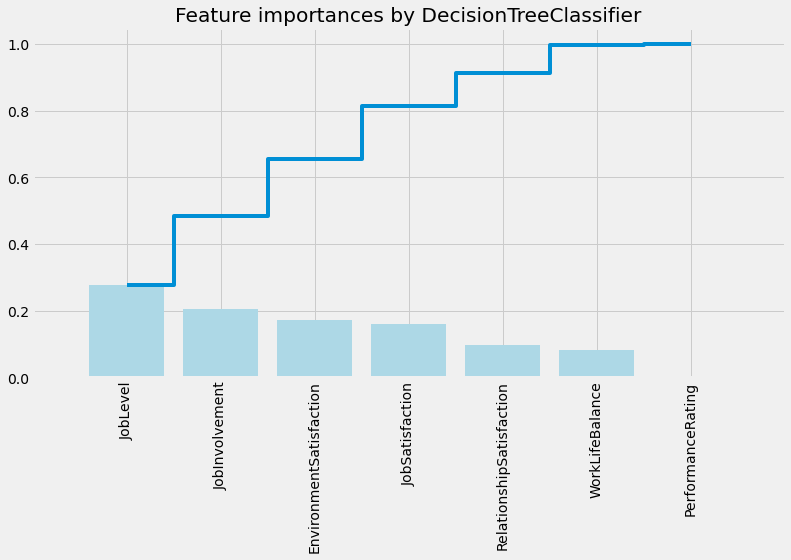

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Create train and test splits
target_name = 'Attrition'
X = df3.drop('Attrition', axis=1)

y=df3[target_name]
X_train,X_test,y_train,t_test=train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df3.drop(['Attrition'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()


Modeling the Data: Logistic Regression Analysis

Logistic Regression commonly deals with the issue of how likely an observation is to belong to each group. This model is commonly used to predict the likelihood of an event occurring. In contrast to linear regression, the output of logistic regression is transformed with a logit function. This makes the output either 0 or 1. This is a useful model to take advantage of for this problem because we are interested in predicting whether an employee will leave (0) or stay (1).

Another reason for why logistic regression is the preferred model of choice is because of its interpretability. Logistic regression predicts the outcome of the response variable (turnover) through a set of other explanatory variables, also called predictors. In context of this domain, the value of our response variable is categorized into two forms: 0 (zero) or 1 (one). The value of 0 (zero) represents the probability of an employee not leaving the company and the value of 1 (one) represents the probability of an employee leaving the company.


In [28]:
# Create an intercept term for the logistic regression equation
df['value'] = 1
indep_var = ['JobLevel','JobInvolvement','EnvironmentSatisfaction','value', 'Attrition']
df = df[indep_var]

# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,JobLevel,JobInvolvement,EnvironmentSatisfaction,value
639,1,3,3,1
1019,2,2,3,1
1389,2,1,4,1
1392,2,3,3,1
1347,2,2,2,1


### 4.2  Using Logistic Regression Coefficients

In [29]:
import statsmodels.api as sm
iv = ['JobLevel','JobInvolvement','EnvironmentSatisfaction', 'value']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

/home/shyam/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Optimization terminated successfully.
         Current function value: 0.407247
         Iterations 7


JobLevel                  -0.568691
JobInvolvement            -0.553845
EnvironmentSatisfaction   -0.282149
value                      1.587329
dtype: float64

### 4.3  Function to compute coefficients

In [30]:
# Create function to compute coefficients
coef = answer.params
def y (coef,JobLevel,JobInvolvement , EnvironmentSatisfaction) : 
    return coef[3] + coef[0]*JobLevel + coef[1]*JobInvolvement + coef[2]*EnvironmentSatisfaction

import numpy as np

# An Employee Having at level 1 and rating 1 for EnvironmentSatisfaction and 1 for JobInvolvement a 54% chance of attrition
y1 = y(coef, 1, 1, 1)
p = np.exp(y1) / (1+np.exp(y1))
p

0.5455344625117409

###  Compare Logistic Regression Model V.S. Decision Tree Model V.S. Random Forest Model

In [31]:
# Compare the Logistic Regression Model V.S. Decision Tree Model V.S. Random Forest Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from numpy.core.umath_tests import inner1d


#Logistic Regression Model
model1 = LogisticRegression(class_weight="balanced",)
model1.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model1.predict(X_test)))

#Decision Tree Model
model2=DecisionTreeClassifier(min_weight_fraction_leaf=0.01,class_weight="balanced",)
model2.fit(X_train,y_train)
print("\n\n ---Decision Tree Model ---")
dtree_roc_auc=roc_auc_score(y_test,model2.predict(X_test))
print("Decision Tree AUC = %2.2f" % dtree_roc_auc)
print(classification_report(y_test,model2.predict(X_test)))

#Random Forest Model
model3=RandomForestClassifier( n_estimators=1000,max_depth=None,min_samples_split=10,class_weight="balanced")
model3.fit(X_train,y_train)
print("\n\n --- Random Forest Model ----")
rforest_roc_auc=roc_auc_score(y_test,model2.predict(X_test))
print("Random forest AUC = %2.2f" % rforest_roc_auc)
print(classification_report(y_test,model3.predict(X_test)))



/home/shyam/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  if __name__ == '__main__':
/home/shyam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




 ---Logistic Model---
Logistic AUC = 0.58
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       185
           1       0.23      0.47      0.31        36

    accuracy                           0.66       221
   macro avg       0.55      0.58      0.54       221
weighted avg       0.77      0.66      0.70       221



 ---Decision Tree Model ---
Decision Tree AUC = 0.57
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       185
           1       0.22      0.44      0.30        36

    accuracy                           0.66       221
   macro avg       0.54      0.57      0.53       221
weighted avg       0.76      0.66      0.69       221



 --- Random Forest Model ----
Random forest AUC = 0.57
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       185
           1       0.23      0.44      0.30        36

    accuracy              

In [32]:
# Using 10 fold Cross-Validation to train Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.695 (0.075)


/home/shyam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shyam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [33]:
# Using 10 fold Cross-Validation to train Decision Tree Model
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier(class_weight = "balanced",min_weight_fraction_leaf=0.01)
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.708 (0.065)


In [34]:
# Using 10 fold Cross-Validation to train Random Forest Model
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators=1000,max_depth=None,min_samples_split=10,class_weight="balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.699 (0.074)


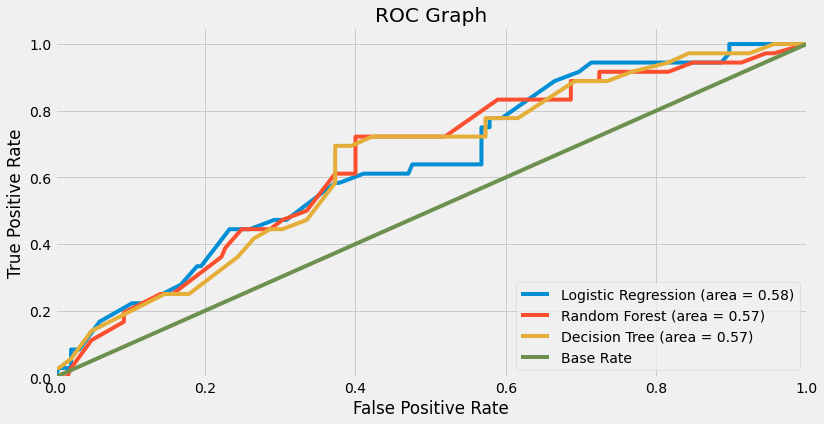

In [35]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#The first column is the probability that the entry has the -1 label 
#and the second column is the probability that the entry has the +1 label.
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rforest_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

